In [1]:
import requests
import json
import datetime
import pandas as pd

def get_page_info(lxs_id, num_page):
    results_list=[]
    json_list=[]
    url = "https://m.owhat.cn/api"
    querystring = {"requesttimestap":"1554158565772"}
    
    for i in range(0, num_page):
        payload = "cmd_s=userindex&cmd_m=starcontractrank&v=5.0.4&client=%7B%22platform%22%3A%22mobile%22%2C%22version%22%3A%225.0.4%22%2C%22deviceid%22%3A%221c4cfab9-3134-1460-455d-6dd85ac27697%22%2C%22channel%22%3A%22owhat%22%7D&data=%7B%22pagenum%22%3A{page}%2C%22pagesize%22%3A1000%2C%22starid%22%3A%22{star_id}%22%2C%22type%22%3A%223%22%7D".format(page=i+1, star_id=str(lxs_id))
        headers = {
                'accept': "application/json",
                'accept-encoding': "gzip, deflate, br",
                'accept-language': "en-US,en;q=0.9,zh-CN;q=0.8,zh-TW;q=0.7,zh;q=0.6",
                'connection': "keep-alive",
                'content-length': "316",
                'content-type': "application/x-www-form-urlencoded",
                'cookie': "",
                'dnt': "1",
                'host': "m.owhat.cn",
                'origin': "https://m.owhat.cn",
                'referer': "https://m.owhat.cn/chanel/startoplist.html?userid=2000571",
                'user-agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36",
                'x-requested-with': "XMLHttpRequest",
                'cache-control': "no-cache",
                'postman-token': "e3560bc7-6ce7-4b08-cfcc-65ed9bd8db02"
                }
        try:
            #print "抓到第"+str(i+1)+"页了！"
            results_list.append(requests.request("POST", url, data=payload, headers=headers, params=querystring).text)
        except:
            pass
        
    for i in range(0, num_page):
        for j in range(0, 100):
            try:
                ranking_info=json.loads(results_list[i])['data']['rank'][j]
                json_list.append(ranking_info)
            except:
                pass
    return json_list

def json_to_score_dict(lxs_id, json_list, num_page):
    score_dict={}
    for k in range(0, 100*num_page):
        try:
            score_dict[k]=float(json_list[k]['powerscore'])
        except:
            pass
    return score_dict

def main_program(lxs_dict, num_page):
    lxs_score_dict={}
    for key, value in lxs_dict.items():
        print("正在抓取练习生"+key+"的数据……")
        json_list=get_page_info(value, num_page)
        lxs_score_dict[key]=pd.DataFrame(json_to_score_dict(key, json_list, num_page), index=[0])

    return lxs_score_dict




In [2]:
lxs_dict={
    "李汶翰": 2000571, 
    "胡春杨": 6454711, 
    "管栎": 6095728, 
    "陈宥维": 6052004, 
    "嘉羿": 6356932, 
    "姚明明": 6634907,  
    "李振宁": 6446540, 
    "姚弛": 6173348,
    "邓超元":6324827,
    "施展":6281759,
    "何昶希":6376574,
    "夏瀚宇":6455303,
    "连淮伟":3238601
}

num_page=300

lxs_score_dict=main_program(lxs_dict, num_page)



正在抓取练习生李汶翰的数据……
正在抓取练习生胡春杨的数据……
正在抓取练习生管栎的数据……
正在抓取练习生陈宥维的数据……
正在抓取练习生嘉羿的数据……
正在抓取练习生姚明明的数据……
正在抓取练习生李振宁的数据……
正在抓取练习生姚弛的数据……
正在抓取练习生邓超元的数据……
正在抓取练习生施展的数据……
正在抓取练习生何昶希的数据……
正在抓取练习生夏瀚宇的数据……
正在抓取练习生连淮伟的数据……


In [5]:
lxs_score_dict

{'李汶翰':       0        1         2        3         4         5        6      \
 0  83196.06  53663.4  53480.32  51410.4  51164.74  40446.22  39421.2   
 
       7        8        9      ...    21919  21920  21921  21922  21923  \
 0  38694.06  35652.4  28304.0  ...     0.01   0.01   0.01   0.01   0.01   
 
    21924  21925  21926  21927  21928  
 0   0.01   0.01   0.01   0.01   0.01  
 
 [1 rows x 21929 columns],
 '胡春杨':       0        1        2        3         4        5        6        7     \
 0  50315.0  49969.8  32716.0  22331.6  21281.44  20260.7  17350.0  14111.0   
 
       8        9     ...   8489  8490  8491  8492  8493  8494  8495  8496  \
 0  13758.5  12478.6  ...    1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
 
    8497  8498  
 0   1.0   1.0  
 
 [1 rows x 8499 columns],
 '管栎':       0         1        2        3         4         5       6       7     \
 0  22320.0  16671.76  13000.0  12379.6  12229.76  11310.32  8116.0  7940.0   
 
      8       9     ...   493

In [6]:
for key, value in lxs_score_dict.items():
    pd.DataFrame(value).to_csv("~/{}_0406_6am.csv".format(key))

In [78]:
lxs_score_dict['胡春杨']

,0,1,2,3,4,5,6,7,8,9,...,8489,8490,8491,8492,8493,8494,8495,8496,8497,8498
0,50315.0,49969.8,32716.0,22331.6,21281.44,20260.7,17350.0,14111.0,13758.5,12478.6,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
for key, value in lxs_score_dict.items():
    display(pd.DataFrame(lxs_score_dict[key], index=[0]).transpose())

,0
0,83196.06
1,53663.40
2,53480.32
3,51410.40
4,51164.74
5,40446.22
6,39421.20
7,38694.06
8,35652.40
9,28304.00


,0
0,50315.00
1,49969.80
2,32716.00
3,22331.60
4,21281.44
5,20260.70
6,17350.00
7,14111.00
8,13758.50
9,12478.60


,0
0,22320.00
1,16671.76
2,13000.00
3,12379.60
4,12229.76
5,11310.32
6,8116.00
7,7940.00
8,7850.00
9,7372.00


,0
0,33584.41
1,26904.86
2,26585.70
3,26053.24
4,24618.00
5,20824.80
6,20374.87
7,19500.74
8,18142.00
9,17407.72


,0
0,36058.72
1,27682.63
2,18167.31
3,17749.54
4,15267.00
5,14364.60
6,13199.30
7,12899.40
8,12428.00
9,10265.25


,0
0,86931.60
1,38038.00
2,21143.70
3,16799.50
4,16496.00
5,14157.40
6,12805.00
7,11722.50
8,11398.00
9,10681.60


,0
0,42268.00
1,42000.00
2,41616.00
3,29854.00
4,28000.00
5,26000.00
6,25926.00
7,25700.00
8,17519.00
9,16240.00


,0
0,39737.80
1,24690.20
2,17002.00
3,15848.00
4,13300.77
5,12804.60
6,12274.00
7,11054.80
8,10199.60
9,10160.60


,0
0,34252.60
1,32825.00
2,29700.00
3,27727.60
4,25792.60
5,21191.12
6,17502.20
7,16227.02
8,13895.00
9,12142.70


,0
0,50000.00
1,21779.00
2,17244.00
3,15655.40
4,15273.68
5,14089.14
6,10607.42
7,9842.54
8,9653.20
9,9483.98


,0
0,11657.72
1,11248.00
2,10000.00
3,6312.40
4,3372.00
5,3000.00
6,2248.00
7,2192.40
8,1869.04
9,1589.20


,0
0,33289.74
1,27585.08
2,10209.81
3,8254.61
4,8010.21
5,6906.14
6,6110.00
7,5644.87
8,5464.80
9,5425.85


,0
0,68252.14
1,24000.00
2,17055.62
3,14507.03
4,13304.20
5,11404.00
6,10000.00
7,8691.00
8,8599.14
9,8509.56


In [56]:
lwh_df=pd.DataFrame(lxs_score_dict['李汶翰'], index=[0]).transpose()

In [116]:
xhy_df=pd.DataFrame(lxs_score_dict['夏瀚宇'], index=[0]).transpose()

In [117]:
xhy_df[xhy_df[0]>0.01].count()
#夏瀚宇有4条金额为0.01元的记录（用户数），在此省略

0    3300
dtype: int64

In [118]:
lxs_score_dict['夏瀚宇']=xhy_df[xhy_df[0]>0.01].transpose()

In [79]:
#李汶翰有6,436条金额为0.01元的记录（用户数），在此省略
lxs_score_dict['李汶翰']=lwh_df[lwh_df[0]>0.01].transpose()

In [119]:
lxs_score_dict['夏瀚宇'].shape

(1, 3300)

In [120]:
#总用户数
count_dict={}
for key, value in lxs_score_dict.items():
    count_dict[key]=pd.DataFrame(lxs_score_dict[key], index=[0]).transpose().count()[0]
    
count_df=pd.DataFrame(count_dict, index=[0]).transpose()
count_df.columns=['总ID数']
display(count_df)

,总ID数
李汶翰,15493
胡春杨,8499
管栎,4946
陈宥维,6206
嘉羿,6124
姚明明,3902
李振宁,5284
姚弛,4604
邓超元,4691
施展,6818


In [121]:
#总用户数
sum_dict={}
for key, value in lxs_score_dict.items():
    sum_dict[key]=pd.DataFrame(lxs_score_dict[key], index=[0]).transpose().sum()[0]
    
sum_df=pd.DataFrame(sum_dict, index=[0]).transpose()
sum_df.columns=['总金额']
display(sum_df)

,总金额
李汶翰,4151163.86
胡春杨,1784690.92
管栎,818636.56
陈宥维,1820185.23
嘉羿,1406173.98
姚明明,1185704.80
李振宁,1491839.34
姚弛,987115.62
邓超元,1034202.95
施展,1169642.77


In [122]:
df_total=pd.merge(count_df, sum_df, left_index=True, right_index=True).sort_values(by=['总金额'], ascending=False)
display(df_total)

,总ID数,总金额
李汶翰,15493,4151163.86
陈宥维,6206,1820185.23
胡春杨,8499,1784690.92
李振宁,5284,1491839.34
嘉羿,6124,1406173.98
姚明明,3902,1185704.80
连淮伟,4190,1176273.35
施展,6818,1169642.77
邓超元,4691,1034202.95
姚弛,4604,987115.62


In [344]:
df_cuv_describe = pd.DataFrame(lxs_score_dict['陈宥维'], index=[0]).transpose().rename(columns={0: '陈宥维'}).describe()
for key, value in lxs_score_dict.items():
    df = pd.DataFrame(lxs_score_dict[key], index=[0]).transpose().rename(columns={0: key})
    df_cuv_describe=pd.merge(df_cuv_describe, df.describe(), left_index=True, right_index=True, suffixes=('', '2'))
df_summary=df_cuv_describe.drop(columns=['陈宥维2']).round(decimals=2).sort_values(axis=1, by=['count'], ascending=False)
display(df_summary)


,李汶翰,胡春杨,施展,陈宥维,嘉羿,李振宁,管栎,邓超元,姚弛,连淮伟,姚明明,夏瀚宇,何昶希
count,15493.00,8499.00,6818.00,6206.00,6124.00,5284.00,4946.00,4691.00,4604.00,4190.00,3902.00,3300.00,1419.00
mean,267.94,209.99,171.55,293.29,229.62,282.33,165.51,220.47,214.40,280.73,303.87,176.41,96.84
std,1558.72,1128.22,903.26,1374.88,989.45,1550.98,713.67,1229.31,1030.19,1396.18,1782.11,903.10,565.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.05,1.00,1.00
25%,12.22,12.48,10.28,10.00,15.00,11.50,6.20,8.00,22.60,10.00,12.60,9.11,11.24
50%,39.00,41.00,51.40,33.14,52.10,36.69,33.48,39.20,36.60,34.12,52.10,30.55,22.48
75%,151.62,141.36,128.53,137.23,135.02,130.00,104.00,117.60,120.22,161.45,181.50,122.20,52.00
max,83196.06,50315.00,50000.00,33584.41,36058.72,42268.00,22320.00,34252.60,39737.80,68252.14,86931.60,33289.74,11657.72


In [345]:
sum_df.columns=['sum']
pd.merge(sum_df, df_summary.transpose(), left_index=True, right_index=True).transpose().sort_values(axis=1, by=['sum'], ascending=False).drop(columns=['李汶翰'])


,陈宥维,胡春杨,李振宁,嘉羿,姚明明,连淮伟,施展,邓超元,姚弛,管栎,夏瀚宇,何昶希
sum,1820185.23,1784690.92,1491839.34,1406173.98,1185704.80,1176273.35,1169642.77,1034202.95,987115.62,818636.56,582143.31,137416.38
count,6206.00,8499.00,5284.00,6124.00,3902.00,4190.00,6818.00,4691.00,4604.00,4946.00,3300.00,1419.00
mean,293.29,209.99,282.33,229.62,303.87,280.73,171.55,220.47,214.40,165.51,176.41,96.84
std,1374.88,1128.22,1550.98,989.45,1782.11,1396.18,903.26,1229.31,1030.19,713.67,903.10,565.18
min,1.00,1.00,1.00,1.00,1.05,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,10.00,12.48,11.50,15.00,12.60,10.00,10.28,8.00,22.60,6.20,9.11,11.24
50%,33.14,41.00,36.69,52.10,52.10,34.12,51.40,39.20,36.60,33.48,30.55,22.48
75%,137.23,141.36,130.00,135.02,181.50,161.45,128.53,117.60,120.22,104.00,122.20,52.00
max,33584.41,50315.00,42268.00,36058.72,86931.60,68252.14,50000.00,34252.60,39737.80,22320.00,33289.74,11657.72


In [125]:
all_records_df=pd.DataFrame()
for key, value in lxs_score_dict.items():
    all_records_df=all_records_df.append(pd.DataFrame(lxs_score_dict[key], index=[0]).transpose())

In [140]:
print("top5 + 卡位八子总体概况")
all_records_df.describe().round(decimals=2)

top5 + 卡位八子总体概况


,0
count,75476.00
mean,235.11
std,1275.63
min,1.00
25%,11.24
50%,39.60
75%,133.50
max,86931.60


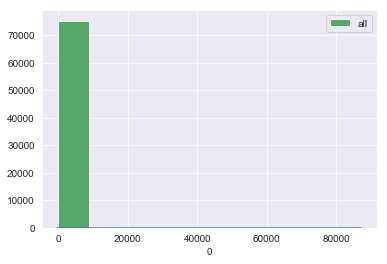

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('darkgrid')
%matplotlib inline  

plt.style.use('seaborn-deep')

x = all_records_df[0]
#bins = np.linspace(-10, 10, 30)


#plt.hist([x, y], bins, label=['x', 'y'])
#plt.legend(loc='upper right')
#plt.show()
pdf = gaussian_kde(pd.DataFrame(lxs_score_dict['李汶翰'], index=[0]).transpose()[0])
p.line(x, pdf(x))
sns.distplot(x)
plt.hist(x, label=['all'])
plt.legend(loc='upper right')
plt.show()



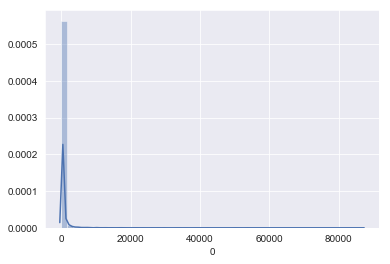

In [130]:
x = all_records_df[0]
ax = sns.distplot(x)

In [138]:
pd.DataFrame(np.percentile(all_records_df[0], np.arange(0, 100, 5)), index = np.linspace(0,.95,20))

,0
0.00,1.000
0.05,2.000
0.10,5.000
0.15,6.300
0.20,10.000
0.25,11.240
0.30,15.000
0.35,20.000
0.40,23.420
0.45,31.240


In [142]:
pd.DataFrame(np.percentile(all_records_df[0], np.arange(90, 100, 1)), index = np.linspace(.9,.99,10))

,0
0.90,418.0000
0.91,473.8225
0.92,525.0400
0.93,595.1325
0.94,683.4900
0.95,810.5050
0.96,1000.0300
0.97,1262.8350
0.98,1769.9500
0.99,3160.7200


In [148]:
all_records_df[0].sum()

17745189.07

In [171]:
percentile_cumu={}
for i in np.arange(100, 1100, 100):
    percentile_cumu[i]=round(all_records_df[0][all_records_df[0]> i].sum()/all_records_df[0].sum(), 2)
print("总额的百分比由付出>多少金额的ID贡献（例：58%的总金额由付出大于1000元的ID贡献）")
percentile_cumu_df=pd.DataFrame(percentile_cumu, index=[0]).transpose()
percentile_cumu_df.columns=['百分比']
display(percentile_cumu_df)

总额的百分比由付出>多少金额的ID贡献（例：58%的总金额由付出大于1000元的ID贡献）


,百分比
100,0.92
200,0.85
300,0.79
400,0.75
500,0.71
600,0.67
700,0.64
800,0.62
900,0.60
1000,0.58


In [291]:
percentile_cumu={}
for i in np.arange(1000, 10000, 1000):
    percentile_cumu[i]=round(all_records_df[0][all_records_df[0]> i].sum()/all_records_df[0].sum(), 2)
print("总额的百分比由付出>多少金额的ID贡献（例：58%的总金额由付出大于1000元的ID贡献）")
percentile_cumu_df=pd.DataFrame(percentile_cumu, index=[0]).transpose()
percentile_cumu_df.columns=['百分比']
display(percentile_cumu_df)

总额的百分比由付出>多少金额的ID贡献（例：58%的总金额由付出大于1000元的ID贡献）


,百分比
1000,0.58
2000,0.44
3000,0.38
4000,0.33
5000,0.30
6000,0.27
7000,0.25
8000,0.22
9000,0.21


In [176]:
np.arange(0,100,10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [183]:
lxs_score_dict[key][0]

0    68252.14
Name: 0, dtype: float64

In [182]:
np.percentile(lxs_score_dict[key][0], np.arange(0, 100, 5))

array([68252.14, 68252.14, 68252.14, 68252.14, 68252.14, 68252.14,
       68252.14, 68252.14, 68252.14, 68252.14, 68252.14, 68252.14,
       68252.14, 68252.14, 68252.14, 68252.14, 68252.14, 68252.14,
       68252.14, 68252.14])

SyntaxError: unexpected EOF while parsing (<ipython-input-191-6936a7a2c748>, line 3)

In [199]:
lwh_decile=pd.DataFrame(np.percentile(lxs_score_dict['李汶翰'].transpose()[0], np.arange(0,100,10)), index = np.linspace(0,.9,10), columns=['李汶翰'])

In [200]:
for key, value in lxs_score_dict.items():
    decile_df=pd.DataFrame(np.percentile(lxs_score_dict[key].transpose()[0], np.arange(0,100,10)), index = np.linspace(0,.9,10), columns=[key])
    lwh_decile=pd.merge(lwh_decile, decile_df, left_index=True, right_index=True, suffixes=('', '2'))                 
df_decile=lwh_decile.drop(columns=['李汶翰2']).round(decimals=2).sort_values(axis=1, by=[0.9], ascending=False)
print("十分位数比较：")
display(df_decile)

十分位数比较：


,姚明明,连淮伟,李振宁,李汶翰,陈宥维,嘉羿,胡春杨,姚弛,邓超元,夏瀚宇,施展,管栎,何昶希
0.0,1.05,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00
0.1,7.13,3.00,5.21,7.22,2.00,7.14,5.00,10.00,5.0,6.11,5.14,2.00,5.21
0.2,10.50,9.00,10.42,7.22,7.70,14.14,8.20,22.60,5.6,6.11,5.20,5.20,11.24
0.3,21.00,13.14,13.14,14.44,14.14,20.00,16.25,23.60,11.2,12.22,11.39,11.16,11.24
0.4,31.50,20.00,21.92,22.22,20.00,34.28,26.91,35.60,19.6,18.33,21.00,16.80,11.24
0.5,52.10,34.12,36.69,39.00,33.14,52.10,41.00,36.60,39.2,30.55,51.40,33.48,22.48
0.6,92.50,66.00,58.97,72.20,53.00,67.10,70.68,55.60,60.0,61.10,66.82,52.00,23.48
0.7,135.00,118.18,100.08,111.08,97.24,102.10,105.64,91.82,90.4,85.54,103.40,75.00,44.96
0.8,249.90,229.37,191.14,208.83,195.00,188.38,190.85,173.96,156.0,161.38,166.82,130.56,67.44
0.9,560.23,542.35,507.93,500.96,488.04,428.02,394.84,378.48,374.2,340.16,310.47,299.48,134.88


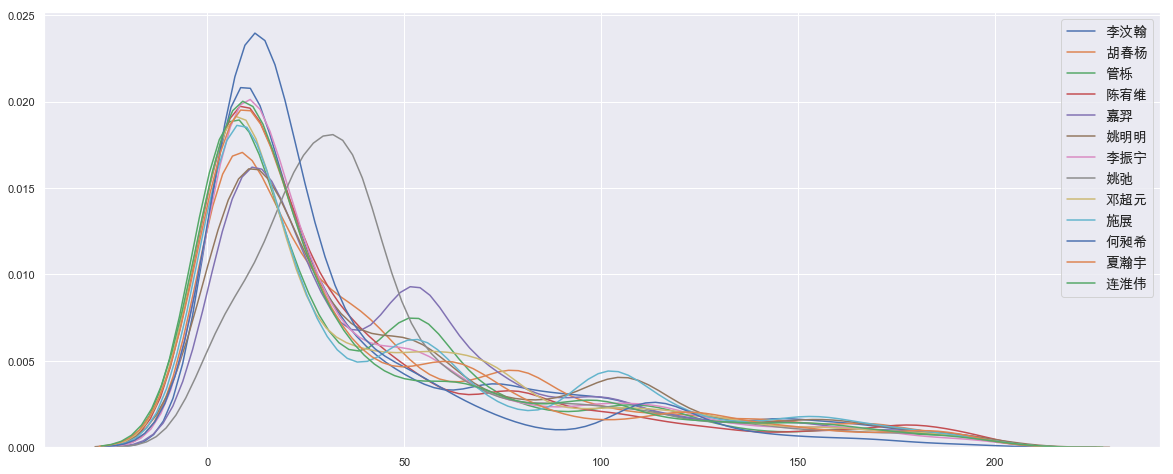

In [277]:
import matplotlib as mpl
import matplotlib.font_manager as mfm
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,8)})
sns.set_color_codes("pastel")
sns.set_style("darkgrid",{"font.sans-serif":['Arial Unicode MS']})
for key, value in lxs_score_dict.items():
    # Draw the density plot
    df=lxs_score_dict[key].transpose()
    plot_df=df[(df[0]<200)][0]
    sns.kdeplot(plot_df, #hist = False, #kde = True, 
                 #bins = np.linspace(0, 500, 10),
                 #kde_kws = {'linewidth': 3},
                 label = key
               )
    plt.legend(prop={'size': 14})
# Plot formatting
#plt.legend(prop={'size': 16}, title = 'Airline')

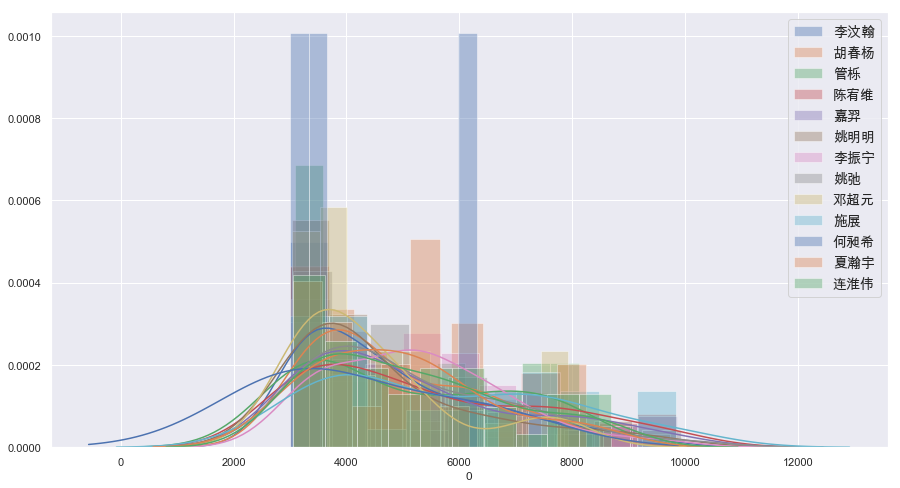

In [303]:
import matplotlib as mpl
import matplotlib.font_manager as mfm
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,8)})
sns.set_color_codes("pastel")
sns.set_style("darkgrid",{"font.sans-serif":['Arial Unicode MS']})
for key, value in lxs_score_dict.items():
    # Draw the density plot
    df=lxs_score_dict[key].transpose()
    plot_df=df[(df[0]<10000)&(df[0]>=3000)][0]
    sns.distplot(plot_df, hist = True, kde = True, bins=10,
                 #bins = np.linspace(0, 500, 10),
                 #kde_kws = {'linewidth': 3},
                 label = key)
    plt.legend(prop={'size': 14})

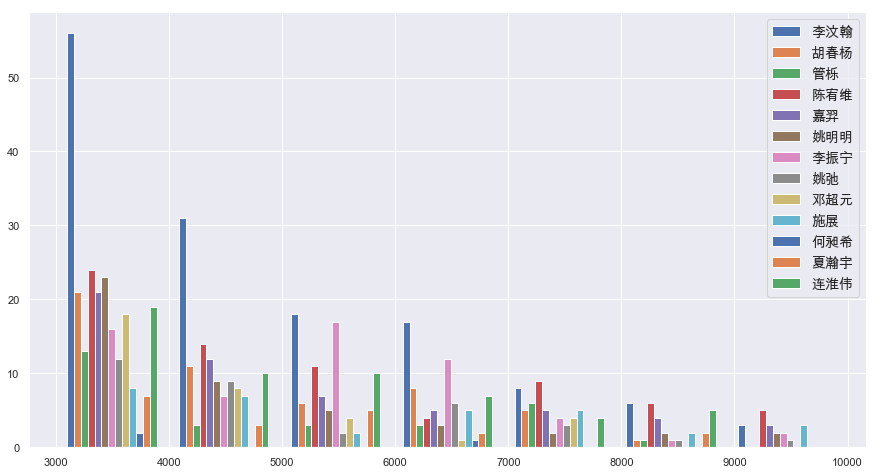

In [310]:
plot_list=[]
lxs_list=[]
for key, value in lxs_score_dict.items():
    lxs_list.append(key)
for key, value in lxs_score_dict.items():
    df=lxs_score_dict[key].transpose()
    plot_df=df[(df[0]<10000)&(df[0]>=3000)][0]
    plot_list.append(plot_df)
plt.hist(plot_list, label = lxs_list, bins=7)
plt.legend(prop={'size': 14})

TypeError: unhashable type: 'list'

In [318]:
import matplotlib as mpl
import matplotlib.font_manager as mfm
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,8)})
sns.set_color_codes("pastel")
sns.set_style("darkgrid",{"font.sans-serif":['Arial Unicode MS']})


plot_list=[]
lxs_list=[]
for key, value in lxs_score_dict[['李振宁','施展']].items():
    lxs_list.append(key)
for key, value in lxs_score_dict[['李振宁','施展']].items():
    df=lxs_score_dict[key].transpose()
    plot_df=df[(df[0]<10000)&(df[0]>=3000)][0]
    plot_list.append(plot_df)
plt.hist(plot_list, label = lxs_list, bins=7)
plt.legend(prop={'size': 14})


TypeError: unhashable type: 'list'

ValueError: x and y must have same first dimension, but have shapes (78,) and (1,)

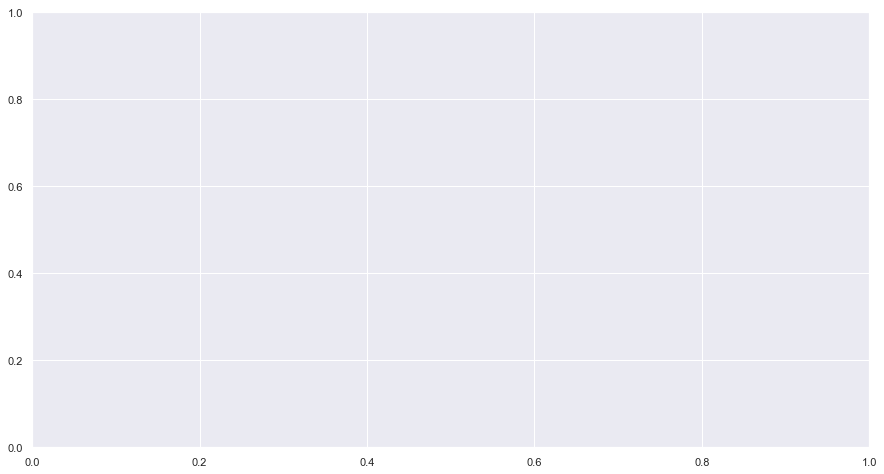

In [320]:
import matplotlib as mpl
import matplotlib.font_manager as mfm
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,8)})
sns.set_color_codes("pastel")
sns.set_style("darkgrid",{"font.sans-serif":['Arial Unicode MS']})

for i in ['施展', '李振宁']:
    # Draw the density plot
    df=lxs_score_dict[i].transpose()
    plot_df=df[(df[0]>3000)][0]
    plt.hist(plot_list, label = lxs_list, bins=7)
    plot_list.append(plot_df)
sns.distplot(plot_list, label = ['施展', '李振宁'], bins=5)
plt.legend(prop={'size': 14})


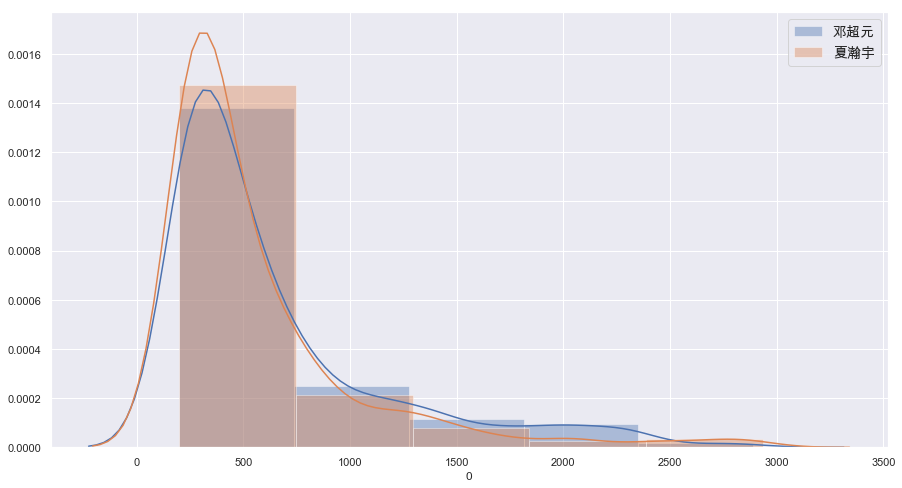

In [287]:
import matplotlib as mpl
import matplotlib.font_manager as mfm
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,8)})
sns.set_color_codes("pastel")
sns.set_style("darkgrid",{"font.sans-serif":['Arial Unicode MS']})

for i in ['邓超元', '夏瀚宇']:
    # Draw the density plot
    df=lxs_score_dict[i].transpose()
    plot_df=df[(df[0]>=200)&(df[0]<3000)][0]
    sns.distplot(plot_df, label = i, bins=5)
    plt.legend(prop={'size': 14})


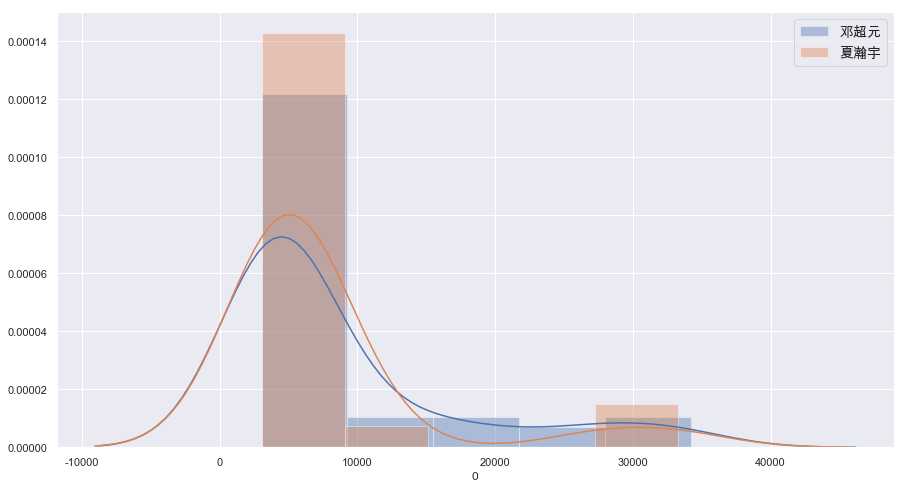

In [286]:
import matplotlib as mpl
import matplotlib.font_manager as mfm
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,8)})
sns.set_color_codes("pastel")
sns.set_style("darkgrid",{"font.sans-serif":['Arial Unicode MS']})

for i in ['邓超元', '夏瀚宇']:
    # Draw the density plot
    df=lxs_score_dict[i].transpose()
    plot_df=df[(df[0]>3000)][0]
    sns.distplot(plot_df, label = i, bins=5)
    plt.legend(prop={'size': 14})


In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as mfm
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,8)})
sns.set_color_codes("pastel")
sns.set_style("darkgrid",{"font.sans-serif":['Arial Unicode MS']})

for i in ['邓超元', '夏瀚宇']:
    # Draw the density plot
    df=lxs_score_dict[i].transpose()
    plot_df=df[(df[0]>=200)&(df[0]<3000)][0]
    sns.distplot(plot_df, label = i)
    plt.legend(prop={'size': 14})


In [244]:
from matplotlib.font_manager import FontManager
fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)
print(mat_fonts)

{'Zapfino', 'Wingdings', 'Zapf Dingbats', '.LastResort', 'Corbel', 'Apple Braille', 'AppleMyungjo', 'Wingdings 3', 'Chalkduster', '.SF Compact Display', 'Times New Roman', 'Farisi', 'Bradley Hand', 'GothamBook', '.SF NS Rounded', 'Diwan Thuluth', '.SF Compact Text', 'Wingdings 2', 'Kokonor', 'AppleGothic', 'DejaVu Serif Display', 'DejaVu Sans Display', 'STIXSizeFiveSym', 'STIXIntegralsSm', 'STIXSizeFourSym', 'Arial Rounded MT Bold', 'DIN Condensed', 'Big Caslon', 'GothamThin', 'Microsoft Sans Serif', 'Trattatello', 'cmsy10', 'Webdings', 'cmtt10', 'Sackers Gothic Std', 'Mishafi Gold', '.SF NS Symbols', 'Skia', 'Consolas', 'Herculanum', 'Gotham', 'Constantia', 'Ayuthaya', 'Cambria', 'Apple Symbols', 'System Font', 'Silom', 'DejaVu Serif', '.SF NS Text Condensed', 'Luminari', 'cmb10', 'STIXVariants', 'Impact', 'Krungthep', 'DejaVu Sans Mono', 'STIXIntegralsUpSm', 'Calibri', 'cmr10', 'Bodoni Ornaments', 'Comic Sans MS', 'Andale Mono', 'Lao Sangam MN', 'STIXIntegralsUpD', 'STIXIntegralsD', 

In [153]:
all_records_df[0][all_records_df[0]> 500].sum()/all_records_df[0].sum()

0.7094200912901291

In [ ]:
pd.DataFrame(np.percentile(all_records_df[0], np.arange(0, 100, 10)))

In [92]:
df_lwh_describe

,李汶翰
count,15493.000000
mean,267.938027
std,1558.724940
min,1.000000
25%,12.220000
50%,39.000000
75%,151.620000
max,83196.060000


In [ ]:
#总用户数
count_dict={}
for key, value in lxs_score_dict.items():
    count_dict[key]=pd.DataFrame(lxs_score_dict[key], index=[0]).transpose().count()[0]
    
pd.DataFrame(count_dict, index=[0]).transpose().sort_values(by=[0], ascending=False)

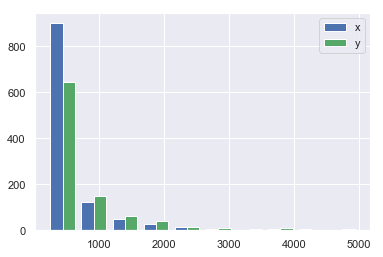

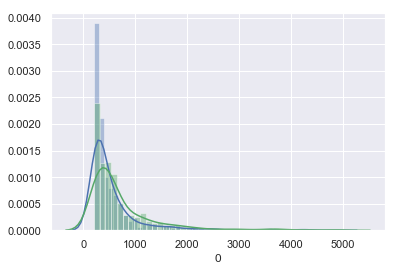

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



sns.set_style('darkgrid')
sz_dict=pd.DataFrame(pd.DataFrame(lxs_score_dict['施展'], index=[0]).transpose())
lzn_dict=pd.DataFrame(pd.DataFrame(lxs_score_dict['李振宁'], index=[0]).transpose())
#lwh_dict[lwh_dict[0]>1]
%matplotlib inline  

plt.style.use('seaborn-deep')

x = sz_dict[(sz_dict[0]>200)&(sz_dict[0]<5000)][0]
y = lzn_dict[(lzn_dict[0]>200)&(lzn_dict[0]<5000)][0]
#bins = np.linspace(-10, 10, 30)


bins = np.linspace(200, 100, 3000)

#plt.hist([x, y], bins, label=['x', 'y'])
#plt.legend(loc='upper right')
#plt.show()


plt.hist([x, y], label=['x', 'y'])
plt.legend(loc='upper right')
plt.show()

sns.distplot(x)
sns.distplot(y)

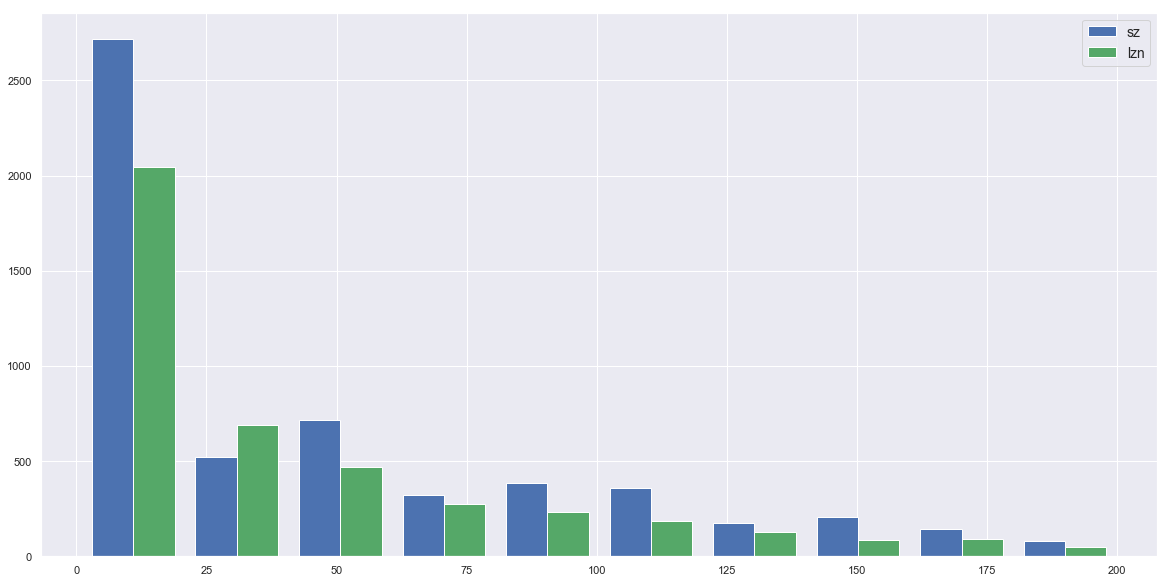

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from pylab import mpl 
mpl.rcParams['font.sans-serif'] = ['Arial Unicode MS']

sns.set_style('darkgrid')
plt.style.use('seaborn-deep')
sz_dict=pd.DataFrame(pd.DataFrame(lxs_score_dict['施展'], index=[0]).transpose())
lzn_dict=pd.DataFrame(pd.DataFrame(lxs_score_dict['李振宁'], index=[0]).transpose())
plt.figure(figsize=(20,10))
x = sz_dict[(sz_dict[0]>=0)&(sz_dict[0]<200)][0]#
y = lzn_dict[(lzn_dict[0]>=0)&(lzn_dict[0]<200)][0]#
plt.hist([x, y], label=['sz', 'lzn'])
plt.legend(loc='upper right')
plt.legend(prop={'size': 14})
plt.show()


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
plt.style.use('seaborn-deep')
sz_dict=pd.DataFrame(pd.DataFrame(lxs_score_dict['李汶翰'], index=[0]).transpose())
lzn_dict=pd.DataFrame(pd.DataFrame(lxs_score_dict['李振宁'], index=[0]).transpose())

x = sz_dict[(sz_dict[0]>2000)&(sz_dict[0]<5000)][0]
y = lzn_dict[(lzn_dict[0]>2000)&(lzn_dict[0]<5000)][0]
plt.hist([x, y], label=['lwh', 'lzn'])
plt.legend(loc='upper right')
plt.show()

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
plt.style.use('seaborn-deep')
sz_dict=pd.DataFrame(pd.DataFrame(lxs_score_dict['李汶翰'], index=[0]).transpose())
lzn_dict=pd.DataFrame(pd.DataFrame(lxs_score_dict['李振宁'], index=[0]).transpose())

x = sz_dict[(sz_dict[0]>5000)][0]
y = lzn_dict[(lzn_dict[0]>5000)][0]
plt.hist([x, y], label=['sz', 'lzn'])
plt.legend(loc='upper right')
plt.show()

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
plt.style.use('seaborn-deep')
sz_dict=pd.DataFrame(pd.DataFrame(lxs_score_dict['李汶翰'], index=[0]).transpose())
lzn_dict=pd.DataFrame(pd.DataFrame(lxs_score_dict['李振宁'], index=[0]).transpose())

x = sz_dict[(sz_dict[0]>5000)][0]
y = lzn_dict[(lzn_dict[0]>5000)][0]
plt.hist([x, y], label=['sz', 'lzn'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
plt.style.use('seaborn-deep')
sz_dict=pd.DataFrame(pd.DataFrame(lxs_score_dict['施展'], index=[0]).transpose())
lzn_dict=pd.DataFrame(pd.DataFrame(lxs_score_dict['李振宁'], index=[0]).transpose())

x = sz_dict[(sz_dict[0]>5000)][0]
y = lzn_dict[(lzn_dict[0]>5000)][0]
plt.hist([x, y], label=['sz', 'lzn'])
plt.legend(loc='upper right')
plt.show()

In [10]:
outlier_removed

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
21879     True
21880     True
21881     True
21882     True
21883     True
21884     True
21885     True
21886     True
21887     True
21888     True
21889     True
21890     True
21891     True
21892     True
21893     True
21894     True
21895     True
21896     True
21897     True
21898     True
21899     True
21900     True
21901     True
21902     True
21903     True
21904     True
21905     True
21906     True
21907     True
21908     True
Name: 0, Length: 21909, dtype: bool

In [43]:
type(lxs_score_dict)

In [ ]:
lxs_score_dict_lwh=main_program({"李汶翰": 2000571}, 200)
lxs_score_dict_lwh['李汶翰']

In [ ]:
lxs_score_dict=lxs_score_dict.update(lxs_score_dict_lwh['李汶翰'])

In [ ]:
lxs_score_dict_lwh['李汶翰']

In [ ]:
pd.DataFrame(pd.DataFrame(lxs_score_dict['李汶翰'], index=[0]).transpose()[0])

In [ ]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg as df

pdf = gaussian_kde(pd.DataFrame(lxs_score_dict['李汶翰'], index=[0]).transpose()[0])

x = np.linspace(-2, 2, 1000)

p = figure(title='李汶翰', x_axis_type="log", plot_height=300, background_fill_color="#fafafa")
p.y_range.start = 0
p.legend.location = "center_right"
p.legend.background_fill_color = "#fefefe"
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
p.grid.grid_line_color="white"
p.line(x, pdf(x))

# plot actual hist for comparison

#hist, edges = np.histogram(measured, density=True, bins=50)

hist, edges = np.histogram(pd.DataFrame(lxs_score_dict['李汶翰'], index=[0]).transpose()[0], density=False, bins=10000)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
   
output_file("hist.html")
show(p)


In [ ]:
df_lwh = pd.DataFrame(lxs_score_dict['李汶翰'], index=[0]).transpose().rename(columns={0: '李汶翰'}).describe()
for key, value in lxs_score_dict.items():
    df = pd.DataFrame(lxs_score_dict[key], index=[0]).transpose().rename(columns={0: key})
    df_lwh=pd.merge(df_lwh, df.describe(), left_index=True, right_index=True, suffixes=('', '2'))
df_lwh.drop(columns=['李汶翰2']).round(decimals=2)

In [ ]:
import seaborn as sns
df = pd.DataFrame(lxs_score_dict['李汶翰'], index=[0]).transpose()
 
# Method 1: on the same Axis
sns.distplot(df[0] , color="skyblue", label="Sepal Length")
sns.plt.legend()
 
plt.show()


In [ ]:
for key, value in lxs_score_dict.items():
    display(pd.DataFrame(lxs_score_dict[key], index=[0]).transpose()[0])


In [ ]:
import numpy as np
import scipy.special

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from numpy import histogram, linspace
from scipy.stats.kde import gaussian_kde

def make_plot(title, hist, edges, x):#, pdf
    p = figure(title=title, tools='', background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
    #p.line(x, pdf, line_color="#ff8888", line_width=4, alpha=0.7, legend="PDF")

    p.y_range.start = 0
    p.legend.location = "center_right"
    p.legend.background_fill_color = "#fefefe"
    p.xaxis.axis_label = 'x'
    p.yaxis.axis_label = 'Pr(x)'
    p.grid.grid_line_color="white"
    return p


for key, value in lxs_score_dict.items():
    measured = pd.DataFrame(lxs_score_dict[key], index=[0]).transpose()[0]
    hist, edges = np.histogram(measured, density=True, bins=50)

    x = np.linspace(0, 50000, 1000)
    #pdf = gaussian_kde(measured)

    p = make_plot("{}".format(key), hist, edges, x)
    output_file("hist.html")

